<a href="https://colab.research.google.com/github/Rigboone-68/Data-Science-DEP/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To download the dataset, we need to set up the Kaggle API in Colab.

In [3]:
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"qasimajlal","key":"4d46ec72b93a57cbf6963287e2090710"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # To set permissions


In [5]:
!pip install kaggle


We'll download the Twitter Airline Sentiment dataset from Kaggle

In [6]:
# Download the Sentiment140 dataset from Kaggle
!kaggle datasets download -d crowdflower/twitter-airline-sentiment


Dataset URL: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
License(s): CC-BY-NC-SA-4.0
 78% 2.00M/2.55M [00:01<00:00, 2.06MB/s]
100% 2.55M/2.55M [00:01<00:00, 2.20MB/s]


In [7]:
# Unzip the dataset
!unzip twitter-airline-sentiment.zip


Archive:  twitter-airline-sentiment.zip
  inflating: Tweets.csv              
  inflating: database.sqlite         


After extracting the dataset, load it into a Pandas DataFrame for analysis.

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Tweets.csv', encoding='latin-1', header=None)

# Display the first few rows
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
2,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
4,570301031407624196,negative,1.0,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)


We need to understand the dataset structure and the distribution of the sentiments. That's why we'll do EDA.

In [9]:
import pandas as pd

# Load the dataset with the correct header
df = pd.read_csv('Tweets.csv', encoding='latin-1')

# Display the first few rows to check column names
df.head()

# Check the shape of the data
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
print(df.isnull().sum())

# Explore sentiment distribution using the correct column name
# Replace 'airline_sentiment' with the actual column name from df.head()
df['airline_sentiment'].value_counts()

Dataset contains 14640 rows and 15 columns.
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


In this dataset:

target 0 = Negative sentiment
target 4 = Positive sentiment
We’ll convert the 4’s to 1’s for simplicity, representing positive sentiments as 1 and negative as 0.

In [10]:
import pandas as pd

# Load the dataset with the correct header
df = pd.read_csv('Tweets.csv', encoding='latin-1')

# Display the first few rows to check column names
df.head()

# Check the shape of the data
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
print(df.isnull().sum())

# Explore sentiment distribution using the correct column name
# Replace 'airline_sentiment' with the actual column name from df.head()
df['airline_sentiment'].value_counts()

# Convert 4s to 1s for binary classification
# Replace 'sentiment' with the actual column name from df.head()
df['airline_sentiment'] = df['airline_sentiment'].replace(4, 1) # Changed 'sentiment' to 'airline_sentiment'

# Check the updated target distribution
df['airline_sentiment'].value_counts() # Changed 'sentiment' to 'airline_sentiment'

Dataset contains 14640 rows and 15 columns.
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


We’ll clean the text by removing unnecessary elements such as URLs, mentions, and special characters.

In [11]:
import re

# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters and punctuation
    text = text.lower()                  # Convert to lowercase
    return text

# Apply the clean_text function to the dataset
df['cleaned_text'] = df['text'].apply(clean_text)

# Check cleaned text
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experienc...
2,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take anothe...
3,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious ente...
4,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it


We need to split the text into tokens (words) and remove common stopwords.

In [13]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Load the dataset with the correct header
df = pd.read_csv('Tweets.csv', encoding='latin-1')

# Display the first few rows to check column names
df.head()

# Check the shape of the data
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
print(df.isnull().sum())

# Explore sentiment distribution using the correct column name
# Replace 'airline_sentiment' with the actual column name from df.head()
df['airline_sentiment'].value_counts()

# Convert 4s to 1s for binary classification
# Replace 'sentiment' with the actual column name from df.head()
df['airline_sentiment'] = df['airline_sentiment'].replace(4, 1) # Changed 'sentiment' to 'airline_sentiment'

# Check the updated target distribution
df['airline_sentiment'].value_counts() # Changed 'sentiment' to 'airline_sentiment'

# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters and punctuation
    text = text.lower()                  # Convert to lowercase
    return text

# Apply the clean_text function to the dataset
df['cleaned_text'] = df['text'].apply(clean_text)

# Check cleaned text
df[['text', 'cleaned_text']].head()

# Function to tokenize and remove stopwords
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stop_words]

# Apply tokenization
df['tokens'] = df['cleaned_text'].apply(tokenize_and_remove_stopwords) # Make sure that df has a column named 'cleaned_text'

# Check the tokenized data
df[['cleaned_text', 'tokens']].head()

# Proceed with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()

# Convert to DataFrame
X = pd.DataFrame(X, columns=tfidf.get_feature_names_out())
print(X.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset contains 14640 rows and 15 columns.
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64
   0016   10  100  1000  10000  100s  1020  1024  1027  1030  ...   âï  âïâï  \
0   0.0  0.0  0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   0.0   
1   0.0  0.0  0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   0.0   
2   0.0  0.0  0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   0.0   
3   0.0  0.0  0.0   0.0    0.0   0.0   0.0   0.0   0.

We will convert the cleaned text into numerical data using TF-IDF Vectorization.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd # import pandas

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
X = tfidf.fit_transform(df['cleaned_text']).toarray()

# Extract target variable
y = df['airline_sentiment']

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (11712, 5000)
Test set size: (2928, 5000)


In [16]:
# Check available columns in the DataFrame
print(df.columns)


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'cleaned_text', 'tokens'],
      dtype='object')


Let’s train and evaluate various models including Logistic Regression, Random Forest, Support Vector Machine (SVM), and Naive Bayes.

In [17]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Load the dataset
df = pd.read_csv('Tweets.csv')  # Adjust the path if necessary

# Step 1: Check the dataset
print(df.columns)  # View all columns in the dataset

# We are only interested in the 'text' and 'airline_sentiment' columns
df = df[['text', 'airline_sentiment']]

# Step 2: Clean the text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters and punctuation
    text = text.lower()                  # Convert to lowercase
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# Step 3: Prepare the data for training
X = df['cleaned_text']  # Features
y = df['airline_sentiment']  # Labels

# Convert the labels to numerical values
y = y.map({'positive': 1, 'neutral': 0, 'negative': -1})

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# Step 5: Train Logistic Regression Model
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg.predict(X_test_tfidf)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Step 6: Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))




Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')
Logistic Regression Accuracy: 0.8066939890710383
Classification Report:
               precision    recall  f1-score   support

          -1       0.83      0.94      0.88      1889
           0       0.68      0.54      0.60       580
           1       0.83      0.61      0.71       459

    accuracy                           0.81      2928
   macro avg       0.78      0.70      0.73      2928
weighted avg       0.80      0.81      0.80      2928

Random Forest Accuracy: 0.7629781420765027
Classification Report:
               precision    recall  f1-score   support

          -1       0.77      0.95      0.85      1889
           0       0.66      0.38      0

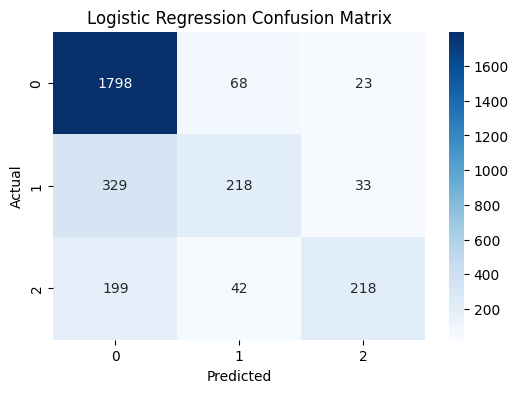

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred_rf)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred_rf, "Logistic Regression")


VADER (Valence Aware Dictionary and sEntiment Reasoner) is specifically designed for sentiment analysis of social media text. We can directly use VADER without heavy preprocessing.

In [98]:
!pip install vaderSentiment


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


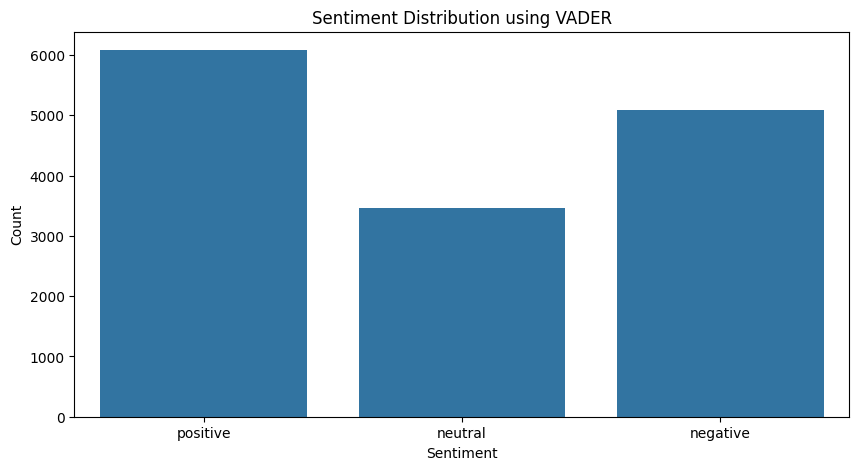

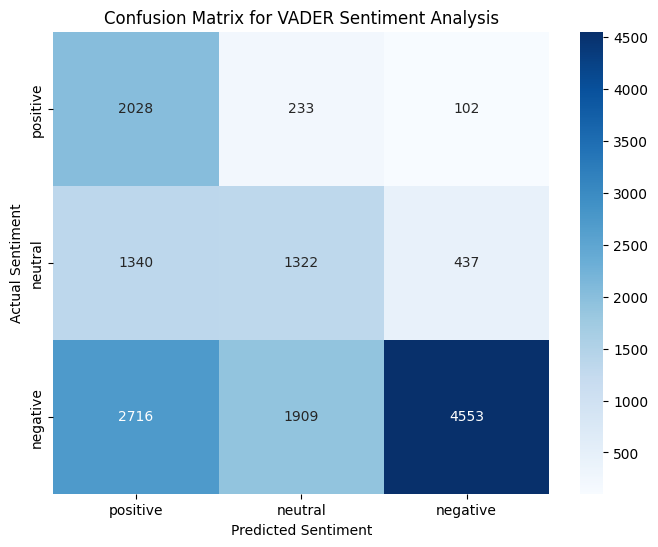

              precision    recall  f1-score   support

    negative       0.89      0.50      0.64      9178
     neutral       0.38      0.43      0.40      3099
    positive       0.33      0.86      0.48      2363

    accuracy                           0.54     14640
   macro avg       0.54      0.59      0.51     14640
weighted avg       0.70      0.54      0.56     14640



In [19]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the dataset
df = pd.read_csv('Tweets.csv')  # Adjust the path if necessary

# We are only interested in the 'text' and 'airline_sentiment' columns
df = df[['text', 'airline_sentiment']]

# Step 2: Clean the text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters and punctuation
    text = text.lower()                  # Convert to lowercase
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# Step 3: Initialize VADER Sentiment Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Step 4: Perform sentiment analysis using VADER
def vader_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']  # Return the compound score

df['vader_score'] = df['cleaned_text'].apply(vader_sentiment)

# Step 5: Convert VADER scores to sentiment categories
def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['vader_score'].apply(categorize_sentiment)

# Step 6: Visualize the results
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='vader_sentiment', order=['positive', 'neutral', 'negative'])
plt.title('Sentiment Distribution using VADER')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Step 7: Evaluate the results
# Create a confusion matrix to compare VADER results with actual sentiments
from sklearn.metrics import confusion_matrix, classification_report

# Map the actual sentiments to numerical values for comparison
y_actual = df['airline_sentiment'].map({'positive': 'positive', 'neutral': 'neutral', 'negative': 'negative'})
y_pred = df['vader_sentiment']

# Confusion Matrix
conf_matrix = confusion_matrix(y_actual, y_pred, labels=['positive', 'neutral', 'negative'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title('Confusion Matrix for VADER Sentiment Analysis')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

# Classification Report
print(classification_report(y_actual, y_pred))


BERT, a transformer-based model that is particularly powerful for sentiment analysis tasks. We'll leverage the Hugging Face transformers library to use BERT for this task.

In [157]:
!pip install transformers
!pip install torch


In [21]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Load the dataset
df = pd.read_csv('Tweets.csv')  # Adjust the path if necessary

# We are only interested in the 'text' and 'airline_sentiment' columns
df = df[['text', 'airline_sentiment']]

# Step 2: Clean the text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters and punctuation
    text = text.lower()                  # Convert to lowercase
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# Step 3: Prepare the data for training
X = df['cleaned_text']  # Features
y = df['airline_sentiment']  # Labels

# Convert the labels to numerical values (adjusted for BERT)
y = y.map({'positive': 2, 'neutral': 1, 'negative': 0})  # Change labels to 0, 1, 2

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: BERT Model Preparation
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=128)

# Convert labels to tensors
train_labels = tf.convert_to_tensor(y_train.values)
test_labels = tf.convert_to_tensor(y_test.values)

# Prepare a TensorFlow dataset for training
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings), train_labels)).shuffle(1000).batch(8)  # Adjusted batch size
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings), test_labels)).batch(8)

# Load BERT model
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Compile the BERT model
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
bert_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the BERT model
bert_model.fit(train_dataset, epochs=3)  # Reduced epochs for testing

# Evaluate BERT model
loss, accuracy = bert_model.evaluate(test_dataset)
print(f"BERT Model Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
1464/1464 [==============================] - 198s 108ms/step - loss: 1.1378 - accuracy: 0.2859
Epoch 2/3
1464/1464 [==============================] - 154s 106ms/step - loss: 1.0986 - accuracy: 0.2190
Epoch 3/3
366/366 [==============================] - 19s 42ms/step - loss: 1.0986 - accuracy: 0.1981
BERT Model Accuracy: 0.1981


VADER provides a rule-based approach for sentiment analysis and is efficient for shorter, informal text like social media posts.

BERT, on the other hand, is a powerful deep learning model that captures more context but requires more computational resources.